# Import Library

In [29]:
import os  #case connect via OS
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import graphviz
from ann_visualizer.visualize import ann_viz

In [30]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [79]:
X_Train = []
Y_Train = []
X_Test = []
Y_Test = []
X_Unseen = []
Y_Unseen = []
class_name = []

In [80]:
#นำ name_folder_trainset มาใส่ใน array
directory_train = 'dataset/train'
folder_train = [folder for folder in os.listdir(directory_train) if os.path.isdir(os.path.join(directory_train, folder))]
print(folder_train)

['BED-DOUBLE', 'BED-SINGLE', 'DOOR-DOUBLE', 'DOOR-SINGLE', 'DOOR-WINDOWED', 'SHOWER', 'SINK', 'SOFA-CORNER', 'SOFA-ONE', 'SOFA-THREE', 'SOFA-TWO', 'TABLE-DINNER', 'TOILET', 'WASHBASIN', 'WINDOW']


In [81]:
directory_test = 'dataset/test'
folder_test = [folder for folder in os.listdir(directory_test) if os.path.isdir(os.path.join(directory_test, folder))]
print(folder_test)

['BED-DOUBLE', 'BED-SINGLE', 'DOOR-DOUBLE', 'DOOR-SINGLE', 'DOOR-WINDOWED', 'SHOWER', 'SINK', 'SOFA-CORNER', 'SOFA-ONE', 'SOFA-THREE', 'SOFA-TWO', 'TABLE-DINNER', 'TOILET', 'WASHBASIN', 'WINDOW']


In [82]:
class_name = folder_train + list(set(folder_train) - set(folder_test))
class_name = class_name[:2]
print(class_name)
print(len(class_name))

['BED-DOUBLE', 'BED-SINGLE', 'DOOR-DOUBLE', 'DOOR-SINGLE', 'DOOR-WINDOWED', 'SHOWER', 'SINK', 'SOFA-CORNER', 'SOFA-ONE', 'SOFA-THREE', 'SOFA-TWO', 'TABLE-DINNER', 'TOILET', 'WASHBASIN', 'WINDOW']
15


In [83]:
for i, folder in enumerate(class_name):
  empty_array = np.zeros(len(class_name))
  empty_array[i] = 1
  files = os.listdir(directory_train+"/"+folder)
  count = 0
  for my_file in files:
    count += 1
    img = load_img(directory_train+"/"+folder+"/"+my_file, color_mode="grayscale")
    img = img.resize((250,250))
    img = img_to_array(img)
    Y_Train.append(empty_array)
    X_Train.append(img)
  print(folder, count)

BED-DOUBLE 1170
BED-SINGLE 810
DOOR-DOUBLE 684
DOOR-SINGLE 1224
DOOR-WINDOWED 342
SHOWER 1080
SINK 684
SOFA-CORNER 306
SOFA-ONE 936
SOFA-THREE 756
SOFA-TWO 648
TABLE-DINNER 1998
TOILET 1206
WASHBASIN 1152
WINDOW 900


In [84]:
for i, folder in enumerate(class_name):
  empty_array = np.zeros(len(class_name))
  empty_array[i] = 1
  files = os.listdir(directory_test+"/"+folder)
  count = 0
  for my_file in files:
    count += 1
    img = load_img(directory_test+"/"+folder+"/"+my_file, color_mode="grayscale")
    img = img.resize((250,250))
    img = img_to_array(img)
    Y_Test.append(empty_array)
    X_Test.append(img)
  print(folder, count)

BED-DOUBLE 386
BED-SINGLE 266
DOOR-DOUBLE 224
DOOR-SINGLE 404
DOOR-WINDOWED 110
SHOWER 356
SINK 224
SOFA-CORNER 98
SOFA-ONE 308
SOFA-THREE 248
SOFA-TWO 212
TABLE-DINNER 662
TOILET 398
WASHBASIN 380
WINDOW 296


In [85]:
directory_unseen = 'dataset/unseen'
for i, folder in enumerate(class_name):
  empty_array = np.zeros(len(class_name))
  empty_array[i] = 1
  files = os.listdir(directory_unseen+"/"+folder)
  count = 0
  for my_file in files:
    count += 1
    img = load_img(directory_unseen+"/"+folder+"/"+my_file, color_mode="grayscale")
    img = img.resize((250,250))
    img = img_to_array(img)
    Y_Unseen.append(empty_array)
    X_Unseen.append(img)
  print(folder, count)

BED-DOUBLE 4
BED-SINGLE 4
DOOR-DOUBLE 4
DOOR-SINGLE 4
DOOR-WINDOWED 4
SHOWER 4
SINK 4
SOFA-CORNER 4
SOFA-ONE 4
SOFA-THREE 4
SOFA-TWO 4
TABLE-DINNER 4
TOILET 4
WASHBASIN 4
WINDOW 4


In [86]:
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Unseen = np.array(X_Unseen)
Y_Unseen = np.array(Y_Unseen)

In [39]:
Vector = 250*250*1
X_Train = X_Train.reshape(len(Y_Train),250,250,1)
X_Test = X_Test.reshape(len(Y_Test),250,250,1)

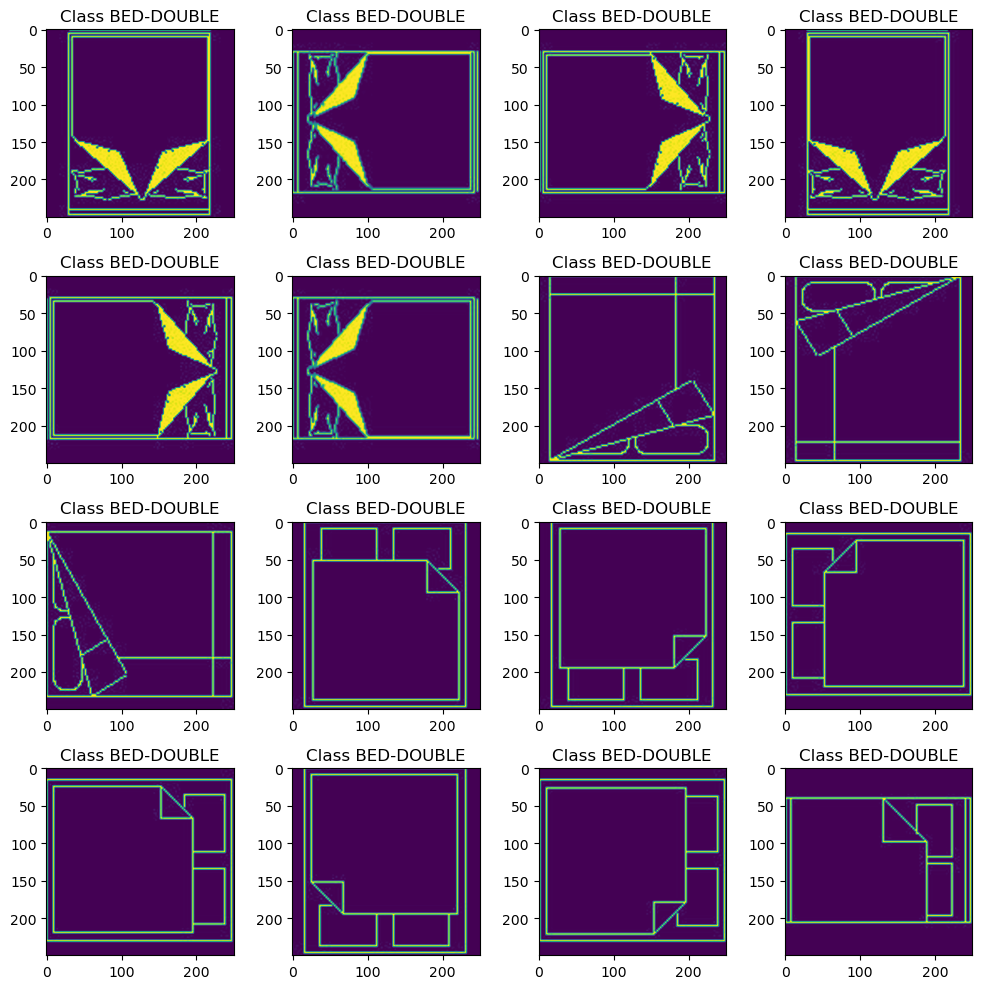

In [40]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

# นำข้อมูลใน Dataset ออกมาแสดง แค่ 16 ตัวโดยจะแสดงเป็น 4 แถว 4 คอลัม
for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X_Train[i]
    plt.imshow(np.uint8(img_array))
    cl = np.argmax(Y_Train[i])
    plt.title("Class {}".format(class_name[cl]))

plt.tight_layout()

In [41]:
# Input
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 padding='same',
                 input_shape=(250,250, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())

# Hidden
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,  activation='relu'))

# Output
model.add(Dense(len(class_name), activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 250, 250, 128)     1280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 83, 83, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 881792)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               112869504 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                      

In [42]:
# ann_viz(model, filename='CNN_Network.gv',title=" Neural Network model from CNN")

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
with tf.device('/cpu:0'):
   X_Train = tf.convert_to_tensor(X_Train, np.float32)
   Y_Train = tf.convert_to_tensor(Y_Train, np.float32)
   X_Test = tf.convert_to_tensor(X_Test, np.float32)
   Y_Test = tf.convert_to_tensor(Y_Test, np.float32)

In [45]:
history = model.fit(X_Train, Y_Train, batch_size=15, epochs=2, validation_data=(X_Test, Y_Test))

Epoch 1/10
927/927 [==============================] - 32s 34ms/step - loss: 10.7815 - accuracy: 0.4427 - val_loss: 0.7756 - val_accuracy: 0.7940
Epoch 2/10
927/927 [==============================] - 31s 34ms/step - loss: 0.7981 - accuracy: 0.7640 - val_loss: 0.2422 - val_accuracy: 0.9337
Epoch 3/10
927/927 [==============================] - 31s 34ms/step - loss: 0.4711 - accuracy: 0.8660 - val_loss: 0.1749 - val_accuracy: 0.9617
Epoch 4/10
927/927 [==============================] - 31s 34ms/step - loss: 0.3400 - accuracy: 0.9075 - val_loss: 0.1142 - val_accuracy: 0.9711
Epoch 5/10
927/927 [==============================] - 31s 34ms/step - loss: 0.2398 - accuracy: 0.9341 - val_loss: 0.0888 - val_accuracy: 0.9783
Epoch 6/10
927/927 [==============================] - 31s 34ms/step - loss: 0.2167 - accuracy: 0.9467 - val_loss: 0.0758 - val_accuracy: 0.9816
Epoch 7/10
927/927 [==============================] - 31s 34ms/step - loss: 0.2183 - accuracy: 0.9455 - val_loss: 0.1370 - val_accuracy

In [46]:
score = model.evaluate(X_Train, Y_Train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.015421262942254543
Train accuracy :  0.9972653985023499


In [47]:
score1 = model.evaluate(X_Test, Y_Test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.07272618263959885
Test accuracy :  0.9825021624565125


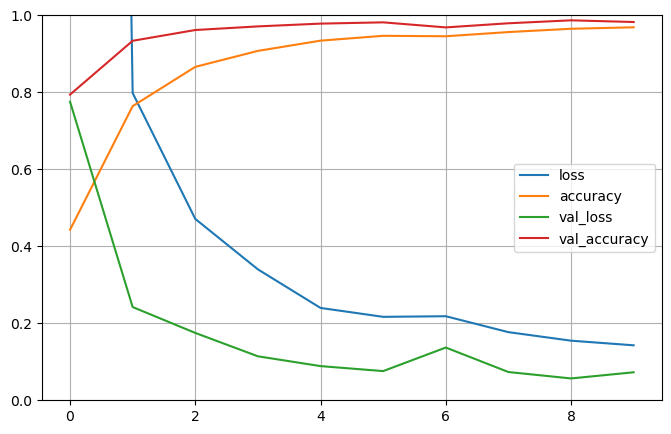

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
y_pred = model.predict(X_Test)

y_test_class = np.argmax(Y_Test,axis=-1)
y_pred_class = np.argmax(y_pred,axis=-1)

print(confusion_matrix(y_test_class,y_pred_class))

143/143 [==============================] - 2s 15ms/step
[[379   7   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2 262   0   0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   8 216   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 404   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0 109   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0 345   0   0   0   0   1   0   1   1   0]
 [  0   3   0   0   0   0 220   0   0   0   1   0   0   0   0]
 [  2   0   0   0   0   3   0  76   3   0   6   6   1   1   0]
 [  1   0   0   0   0   4   0   0 302   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0 248   0   0   0   0   0]
 [  0   3   2   0   0   0   0   0   0   3 204   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   3 658   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0 397   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0 379   0]
 [  0   1   0   0   0   0   0   0   0   2   0   0   0   0 293]

In [50]:
print('F1 Score: %.3f' % f1_score(y_test_class, y_pred_class, average='macro'))
	
print('Accuracy: %.3f' % (accuracy_score(y_test_class, y_pred_class) * 100))
	
print('Recall: %.3f' % recall_score(y_test_class, y_pred_class, average='macro'))
	
print('Precision: %.3f' % precision_score(y_test_class, y_pred_class, average='macro'))

F1 Score: 0.976
Accuracy: 98.250
Recall: 0.971
Precision: 0.982


In [87]:
test_predict = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = test_predict.predict(X_Unseen)
for i in range(15):
  print(class_name[int(np.argmax(result[i]))])

2/2 [==============================] - 0s 183ms/step
BED-DOUBLE
BED-DOUBLE
BED-DOUBLE
BED-DOUBLE
BED-SINGLE
BED-SINGLE
BED-SINGLE
BED-SINGLE
DOOR-DOUBLE
DOOR-DOUBLE
DOOR-DOUBLE
DOOR-DOUBLE
DOOR-SINGLE
DOOR-SINGLE
DOOR-SINGLE


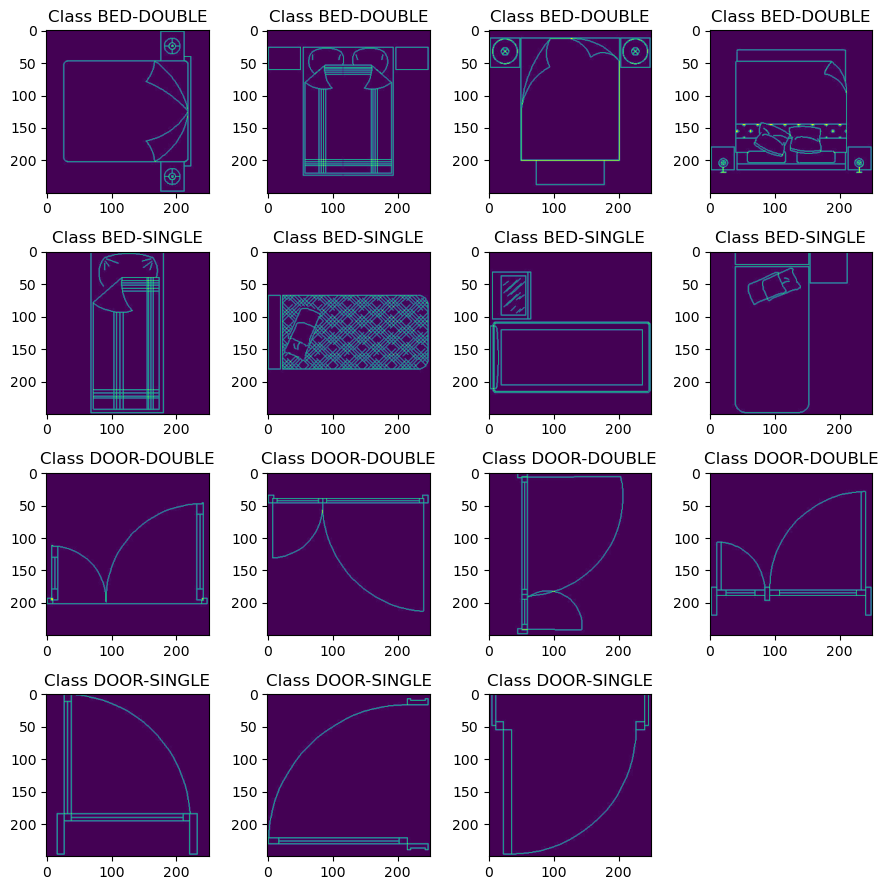

In [88]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(15):
    plt.subplot(4,4,i+1)
    plt.imshow(np.uint8(X_Unseen[i]))
    cl = np.argmax(result[i])
    plt.title("Class {}".format(class_name[cl]))
plt.tight_layout()

In [89]:

y_test_class = np.argmax(Y_Unseen,axis=-1)
y_pred_class = np.argmax(result,axis=-1)

print(confusion_matrix(y_test_class,y_pred_class))

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


In [91]:
print('F1 Score: %.3f' % f1_score(y_test_class, y_pred_class, average='macro'))
	
print('Accuracy: %.3f' % (accuracy_score(y_test_class, y_pred_class) * 100))
	
print('Recall: %.3f' % recall_score(y_test_class, y_pred_class, average='macro'))
	
print('Precision: %.3f' % precision_score(y_test_class, y_pred_class, average='macro'))

F1 Score: 0.983
Accuracy: 98.333
Recall: 0.983
Precision: 0.987


# Export Model

In [53]:
model.save('CADDetection')